In [ ]:
!apt-get update -qq && apt-get install -y -qq build-essential
!pip install PyYAML --upgrade
!pip install transformers wandb xgboost protobuf seaborn scikit-learn tqdm
!pip install quinine --no-deps
!pip install munch toposort funcy cerberus cytoolz

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 100.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
quinine 0.3.0 requires Cerberus==1.3.2, but you have cerberus 1.3.8 which is incompatible.
quinine 0.3.0 requires cytoolz==0.11.0, but you have cytoolz 1.1.0 which is incompatible.
quinine 0.3.0 requires funcy==1.15, but you have funcy 2.0 which is incompatible.
quinine 0.3.0 requires gin-config==0.3.0, but you have gin-config 0.5.0 which is incompatible.
quinine 0.3.0 requires munch==2.5.0, but you have munch 4.0.0 which is incompatible.
quinine 0.3.0 requires pyyaml==5.4, but you have pyyaml 6.0.3 which is incompatible.
quinine 0.3.0 requires toposor

In [ ]:
!cd /content/src && python train.py --config conf/linear_regression_lstm_attention.yaml

2025-11-20 06:34:32.922047: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763620472.943363   50281 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763620472.950026   50281 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1763620472.966645   50281 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763620472.966676   50281 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763620472.966679   50281 computation_placer.cc:177] computation placer alr

In [ ]:
!cd /content/src && python train.py --config conf/linear_regression_lstm.yaml

2025-11-20 06:07:12.854577: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763618832.877079   42943 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763618832.883785   42943 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1763618832.901448   42943 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763618832.901490   42943 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763618832.901493   42943 computation_placer.cc:177] computation placer alr

In [ ]:
!cd /content/src && python train.py --config conf/linear_regression.yaml

2025-11-20 05:27:42.805608: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763616462.827650   32686 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763616462.834434   32686 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1763616462.851767   32686 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763616462.851798   32686 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763616462.851801   32686 computation_placer.cc:177] computation placer alr

In [ ]:
!cd /content/src && python eval.py /content/models

2025-11-20 06:49:21.847172: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763621361.868968   54137 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763621361.875571   54137 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1763621361.892150   54137 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763621361.892186   54137 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763621361.892189   54137 computation_placer.cc:177] computation placer alr

In [ ]:
from collections import OrderedDict
import re
import os
import sys
sys.path.insert(0,'/content/src')
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
from tqdm.notebook import tqdm

from eval import get_run_metrics, read_run_dir, get_model_from_run
from plot_utils import basic_plot, collect_results, relevant_model_names

%matplotlib inline

sns.set_theme('notebook', 'darkgrid')
palette = sns.color_palette('colorblind')

run_dir = "/content/models"

In [ ]:
df = read_run_dir(run_dir)
df

run_id                              task  \
0  da8de541-27db-4adf-a7c8-d3dc54dea751            linear_regression_lstm   
1  0ecb7059-0e84-45a2-806e-79c62caaeb14  linear_regression_lstm_attention   
2  f57b68e6-9c46-4290-b70a-99a8ee9cdeeb                 linear_regression   

                                        model kwargs  num_tasks  num_examples  \
0                    LSTM-layers=1-hidden=128                -1            -1   
1  LSTM-Attention-layers=1-hidden=142-heads=2                -1            -1   
2                              Transformer-xs                -1            -1   

   n_dims  n_layer  n_head                          run_name  
0      20        3       2            linear_regression_lstm  
1      20        3       2  linear_regression_lstm_attention  
2      20        3       2        linear_regression_standard

In [ ]:
task = "linear_regression_lstm_attention"

run_id = "0ecb7059-0e84-45a2-806e-79c62caaeb14"

run_path = os.path.join(run_dir, task, run_id)
recompute_metrics = False

if recompute_metrics:
    get_run_metrics(run_path)

linear_regression_lstm_attention 0ecb7059-0e84-45a2-806e-79c62caaeb14


100%|██████████| 15/15 [00:00<00:00, 210416.59it/s]

Available models in metrics: ['LSTM-Attention-layers=1-hidden=142-heads=2', 'Least Squares', '3-Nearest Neighbors', 'Averaging']


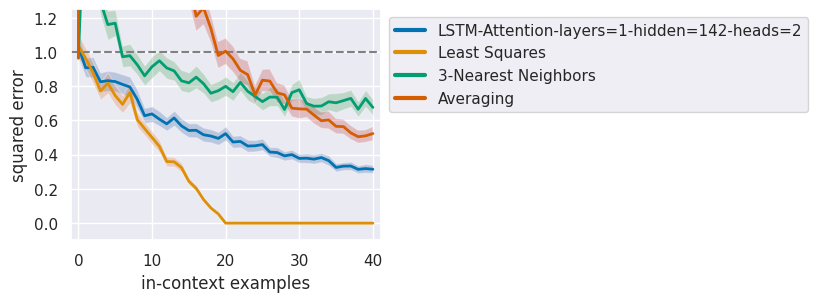

In [ ]:
def valid_row(r):
    return r.task == task and r.run_id == run_id

metrics = collect_results(run_dir, df, valid_row=valid_row)
_, conf = get_model_from_run(run_path, only_conf=True)
n_dims = conf.model.n_dims

print("Available models in metrics:", list(metrics["standard"].keys()))

basic_plot(metrics["standard"])
plt.show()

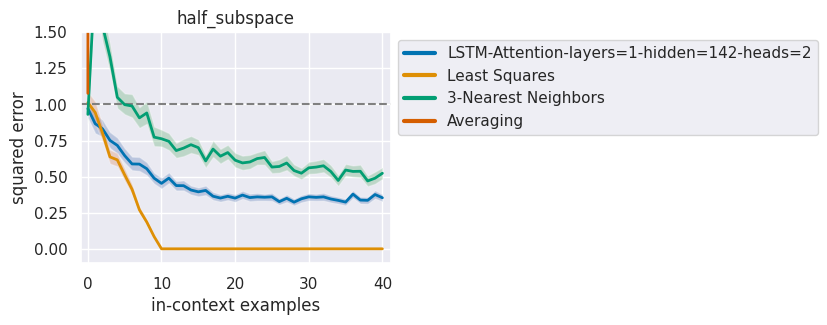

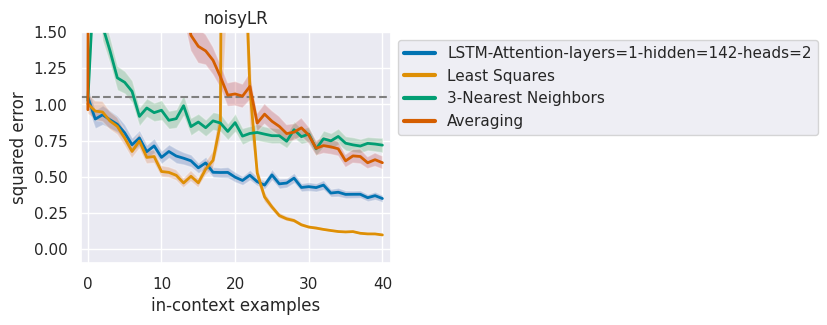

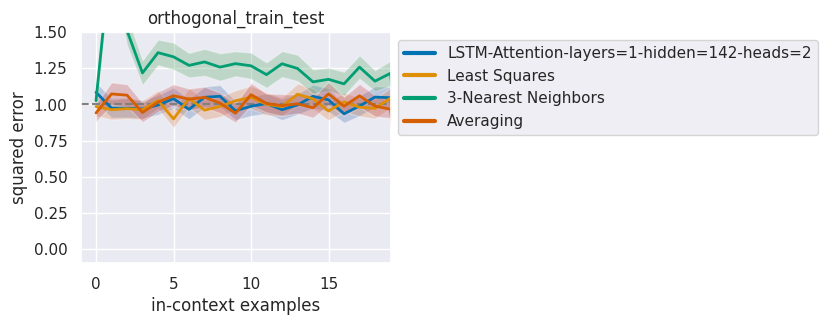

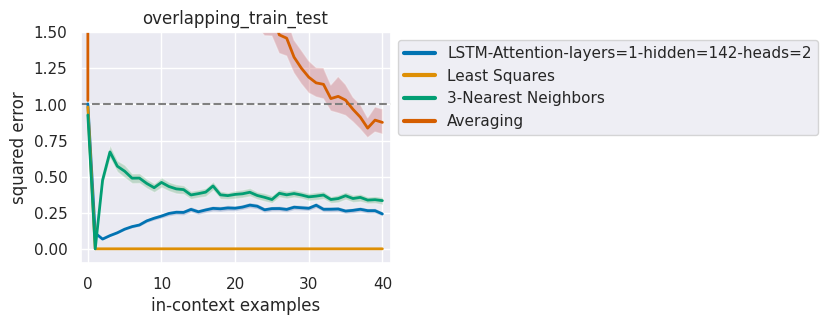

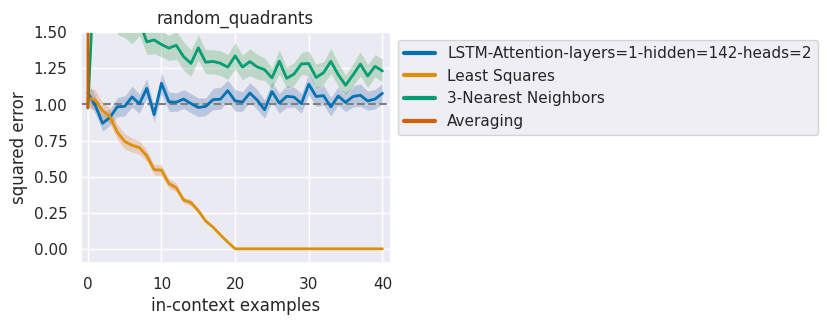

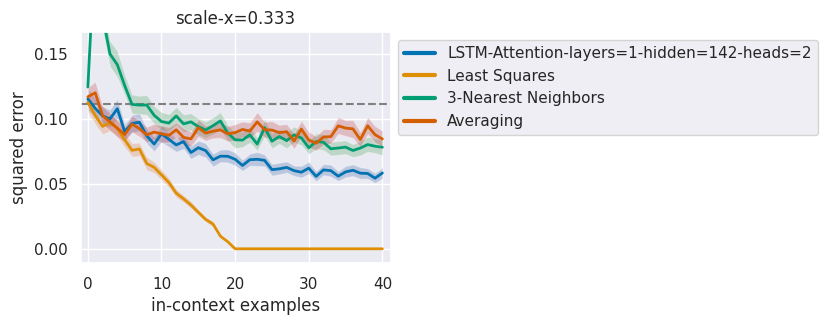

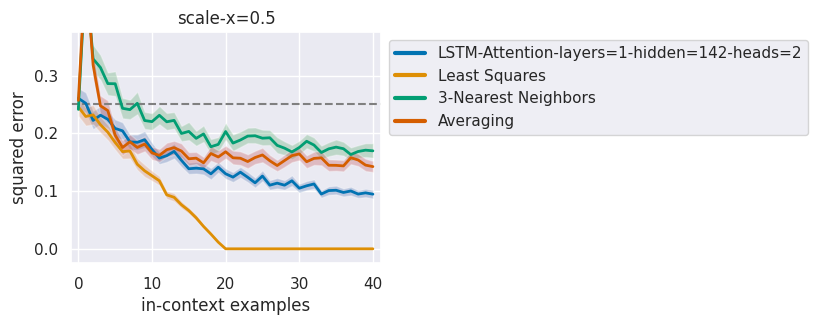

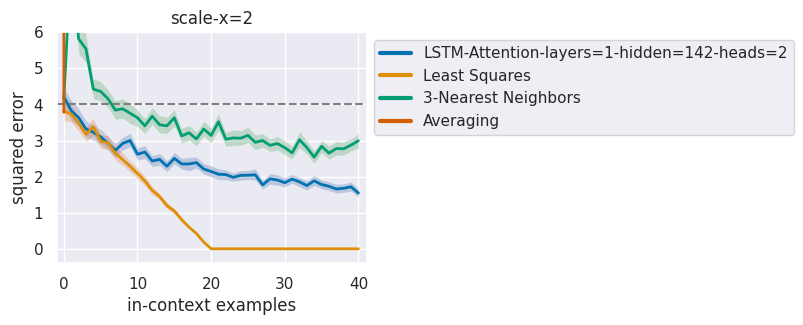

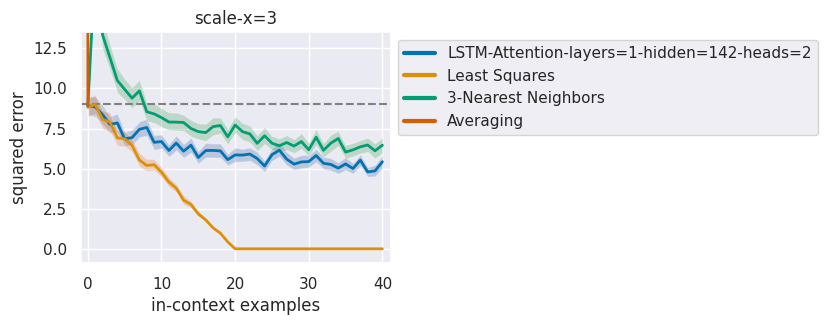

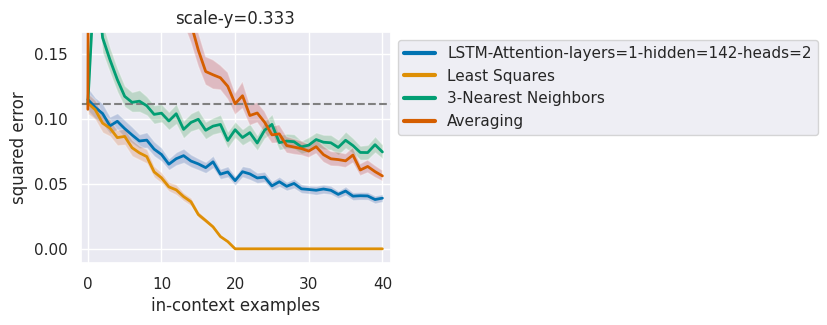

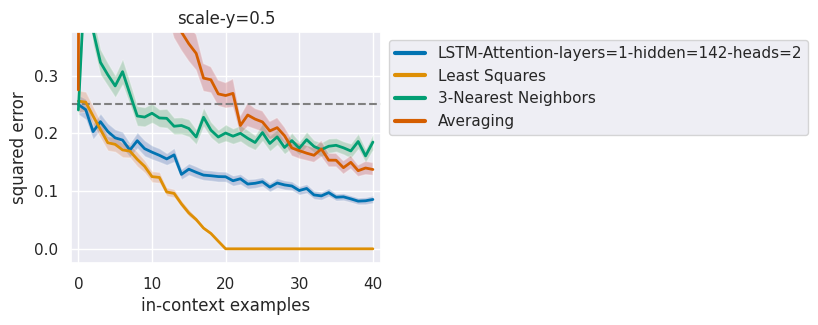

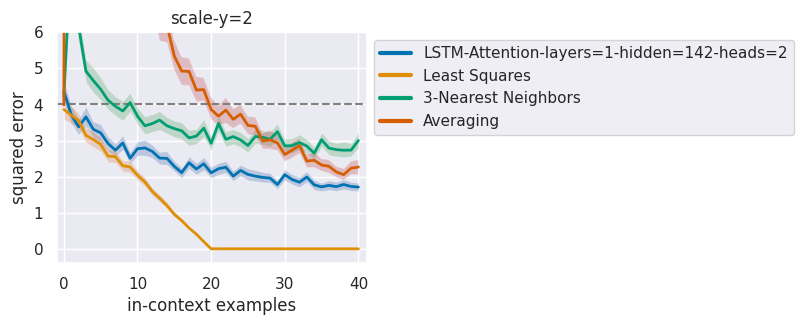

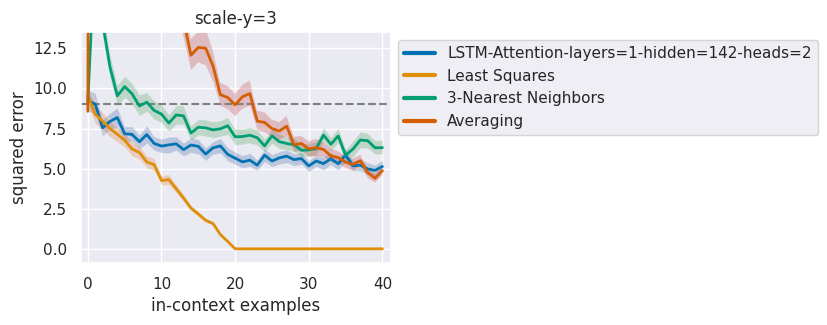

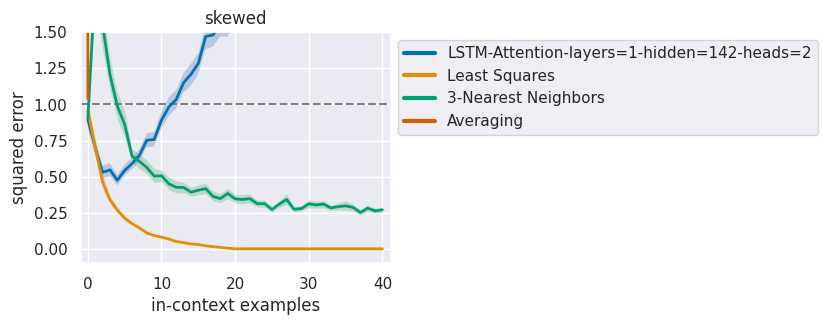

In [ ]:
for name, metric in metrics.items():
    if name == "standard": continue

    if "scale" in name:
        scale = float(name.split("=")[-1])**2
    else:
        scale = 1.0

    trivial = 1.0 if "noisy" not in name else (1+1/n_dims)
    fig, ax = basic_plot(metric, trivial=trivial * scale)
    ax.set_title(name)

    if "ortho" in name:
        ax.set_xlim(-1, n_dims - 1)
    ax.set_ylim(-.1 * scale, 1.5 * scale)

    plt.show()

Loading Transformer from /content/models/linear_regression/f57b68e6-9c46-4290-b70a-99a8ee9cdeeb
linear_regression_standard f57b68e6-9c46-4290-b70a-99a8ee9cdeeb


100%|██████████| 15/15 [00:00<00:00, 222312.93it/s]


Loading LSTM from /content/models/linear_regression_lstm/da8de541-27db-4adf-a7c8-d3dc54dea751
linear_regression_lstm da8de541-27db-4adf-a7c8-d3dc54dea751


100%|██████████| 15/15 [00:00<00:00, 163414.44it/s]


Loading LSTM-Attention from /content/models/linear_regression_lstm_attention/0ecb7059-0e84-45a2-806e-79c62caaeb14
linear_regression_lstm_attention 0ecb7059-0e84-45a2-806e-79c62caaeb14


100%|██████████| 15/15 [00:00<00:00, 249660.95it/s]


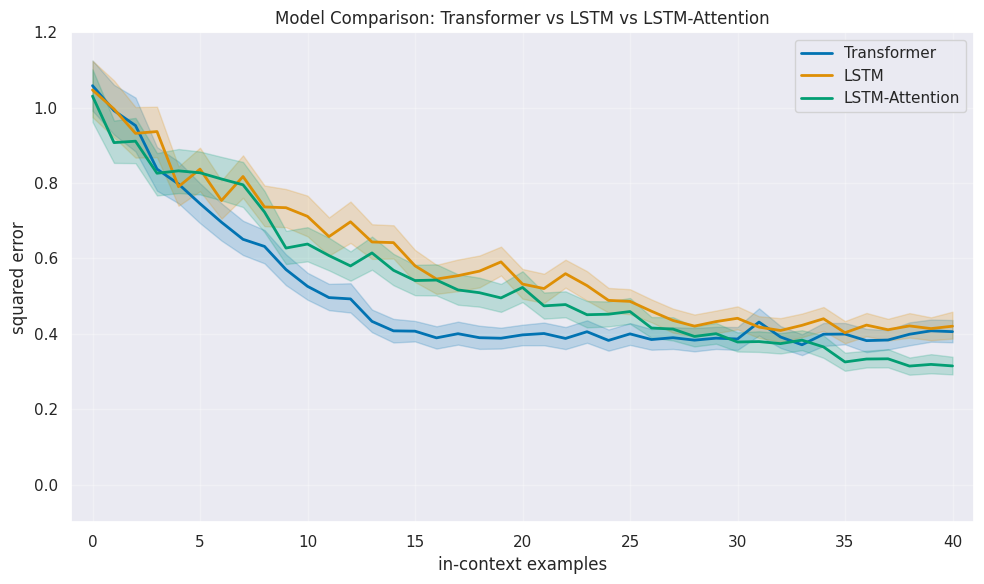

In [ ]:
import os

models_to_compare = [
    {
        'name': 'Transformer',
        'task': 'linear_regression',
        'run_id': 'f57b68e6-9c46-4290-b70a-99a8ee9cdeeb',
        'color': palette[0]
    },
    {
        'name': 'LSTM',
        'task': 'linear_regression_lstm',
        'run_id': 'da8de541-27db-4adf-a7c8-d3dc54dea751',
        'color': palette[1]
    },
    {
        'name': 'LSTM-Attention',
        'task': 'linear_regression_lstm_attention',
        'run_id': '0ecb7059-0e84-45a2-806e-79c62caaeb14',
        'color': palette[2]
    }
]

all_model_metrics = {}

for model_info in models_to_compare:
    task_name = model_info['task']
    run_id = model_info['run_id']
    model_name = model_info['name']

    run_path = os.path.join(run_dir, task_name, run_id)

    if os.path.exists(run_path):
        print(f"Loading {model_name} from {run_path}")

        def valid_row_single(r):
            return r.task == task_name and r.run_id == run_id

        metrics_single = collect_results(run_dir, df, valid_row=valid_row_single)

        if "standard" in metrics_single:
            all_model_metrics[model_name] = {
                'metrics': metrics_single["standard"],
                'color': model_info['color']
            }
        else:
            print(f"Warning: No 'standard' metrics found for {model_name}")
    else:
        print(f"Warning: Path not found for {model_name}: {run_path}")

if len(all_model_metrics) > 0:
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))

    _, conf_any = get_model_from_run(
        os.path.join(run_dir, models_to_compare[0]['task'], models_to_compare[0]['run_id']),
        only_conf=True
    )
    n_dims = conf_any.model.n_dims

    for model_name, model_data in all_model_metrics.items():
        metrics = model_data['metrics']
        color = model_data['color']

        model_keys = list(metrics.keys())
        if len(model_keys) > 0:
            actual_key = model_keys[0]
            metric = metrics[actual_key]

            mean_vals = metric['mean']
            low_vals = metric['bootstrap_low']
            high_vals = metric['bootstrap_high']

            x_range = range(len(mean_vals))

            ax.plot(x_range, mean_vals, '-', label=model_name, color=color, lw=2)
            ax.fill_between(x_range, low_vals, high_vals, alpha=0.2, color=color)

    ax.set_xlabel("in-context examples")
    ax.set_ylabel("squared error")
    ax.set_title("Model Comparison: Transformer vs LSTM vs LSTM-Attention")
    ax.legend(loc='best')
    ax.grid(True, alpha=0.3)
    ax.set_xlim(-1, len(mean_vals))
    ax.set_ylim(-0.1, 1.2)

    plt.tight_layout()
    plt.show()
else:
    print("No valid model metrics found!")

In [ ]:
def valid_row_compare(r):
    for _, run_id, _ in model_configs:
        if r.run_id == run_id:
            return True
    return False

if len(model_configs) > 0:
    metrics_multi = collect_results(run_dir, df, valid_row=valid_row_compare)

    print(f"\nAvailable metric types: {list(metrics_multi.keys())[:5]}...")
    print(f"\nAvailable models in 'standard': {list(metrics_multi['standard'].keys())}")
else:
    print("No models found for comparison")

linear_regression_lstm da8de541-27db-4adf-a7c8-d3dc54dea751


100%|██████████| 15/15 [00:00<00:00, 255750.24it/s]


linear_regression_lstm_attention 0ecb7059-0e84-45a2-806e-79c62caaeb14


100%|██████████| 15/15 [00:00<00:00, 160087.94it/s]


linear_regression_standard f57b68e6-9c46-4290-b70a-99a8ee9cdeeb


100%|██████████| 15/15 [00:00<00:00, 158875.15it/s]


Available metric types: ['half_subspace', 'noisyLR', 'orthogonal_train_test', 'overlapping_train_test', 'random_quadrants']...

Available models in 'standard': ['LSTM-layers=1-hidden=128', 'Least Squares', '3-Nearest Neighbors', 'Averaging', 'LSTM-Attention-layers=1-hidden=142-heads=2', 'Transformer-xs']


Available metric types: ['half_subspace', 'noisyLR', 'orthogonal_train_test', 'overlapping_train_test', 'random_quadrants', 'scale-x=0.333', 'scale-x=0.5', 'scale-x=2', 'scale-x=3', 'scale-y=0.333', 'scale-y=0.5', 'scale-y=2', 'scale-y=3', 'skewed']


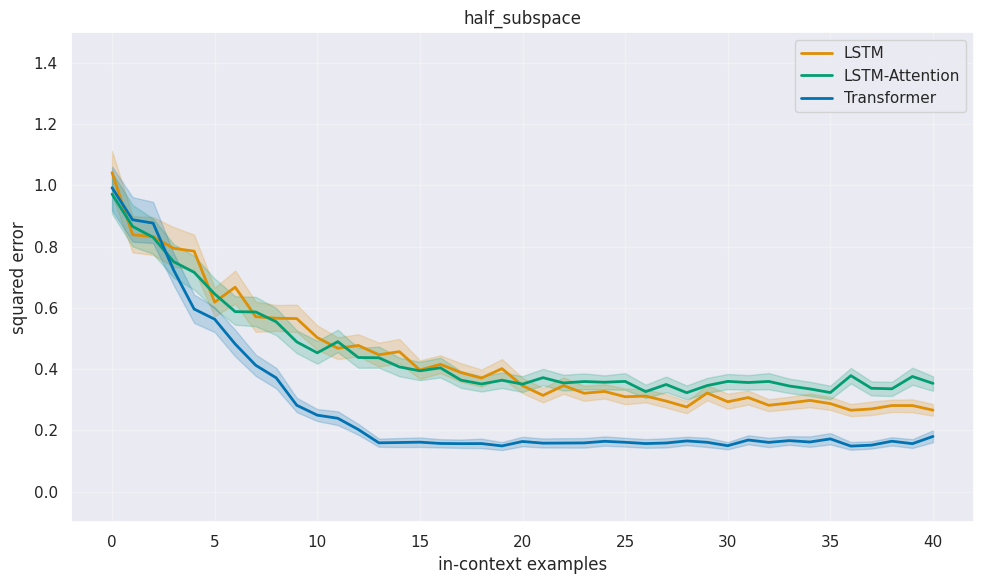

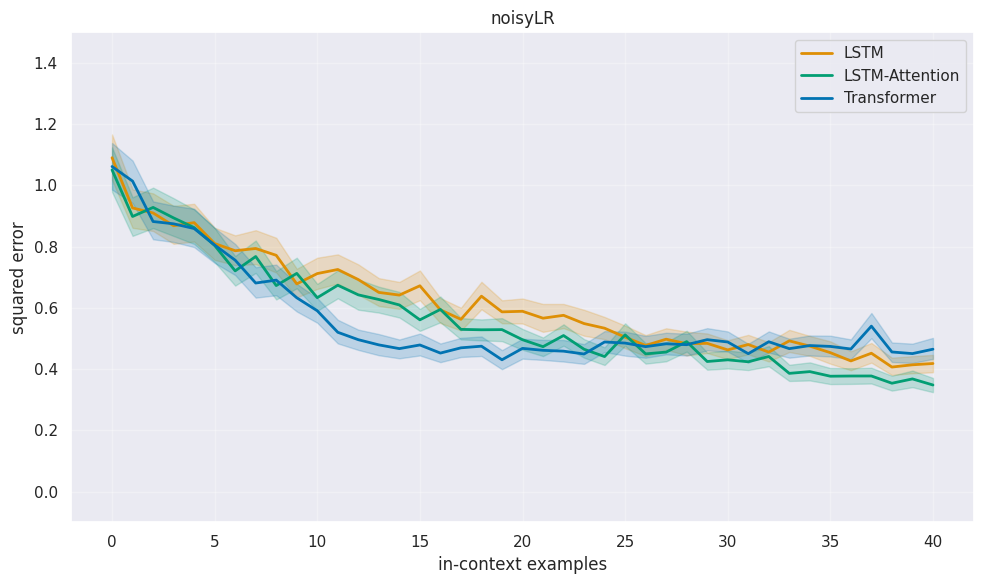

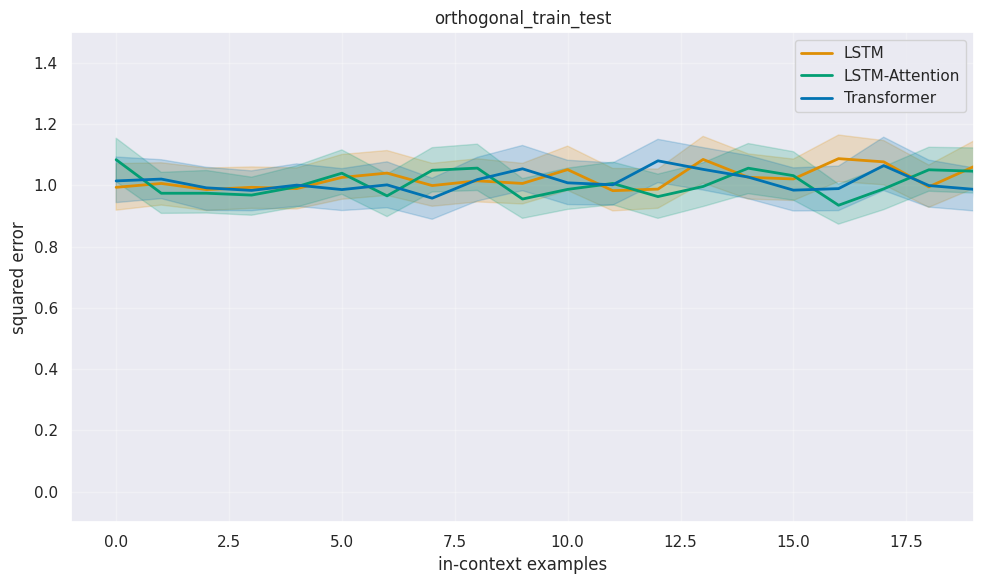

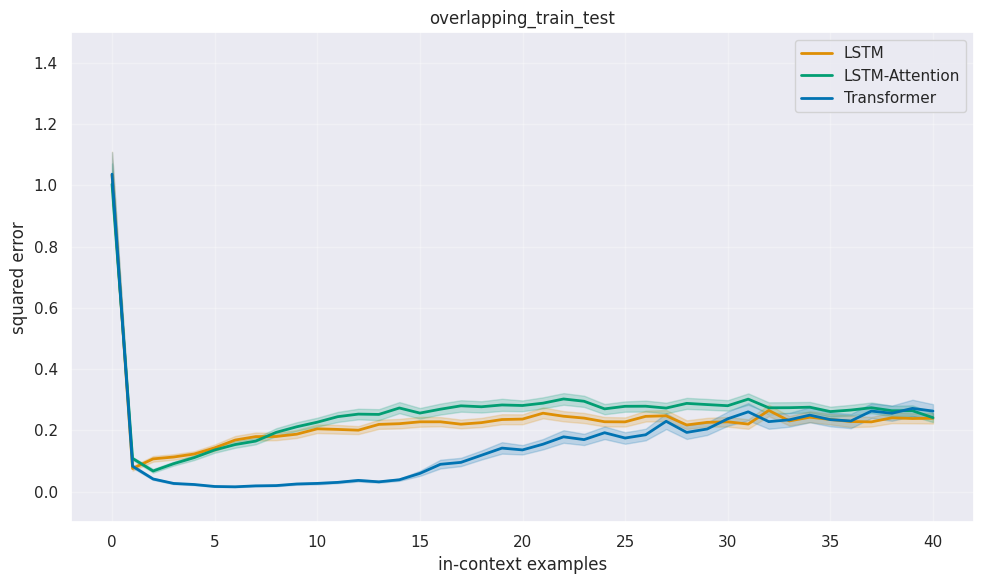

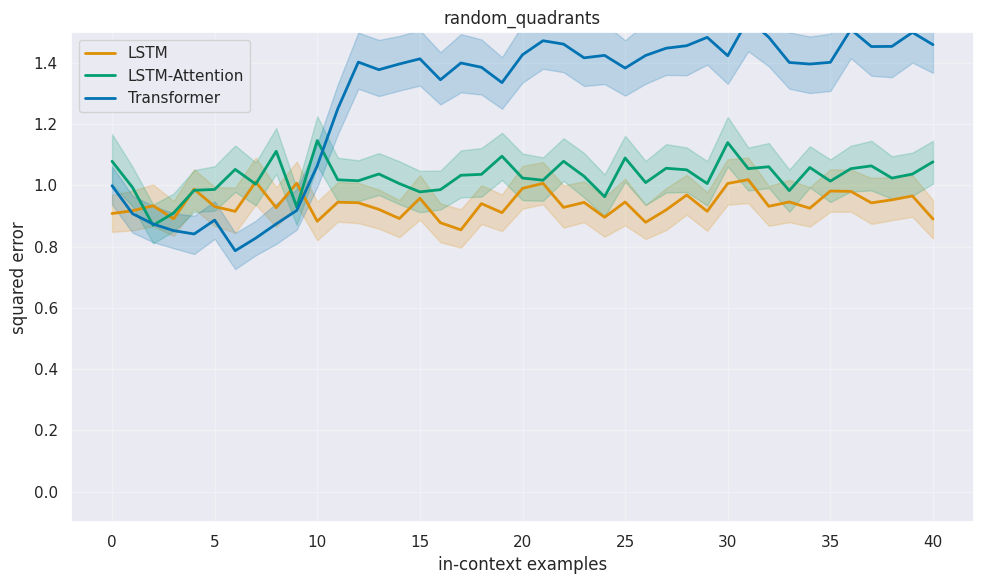

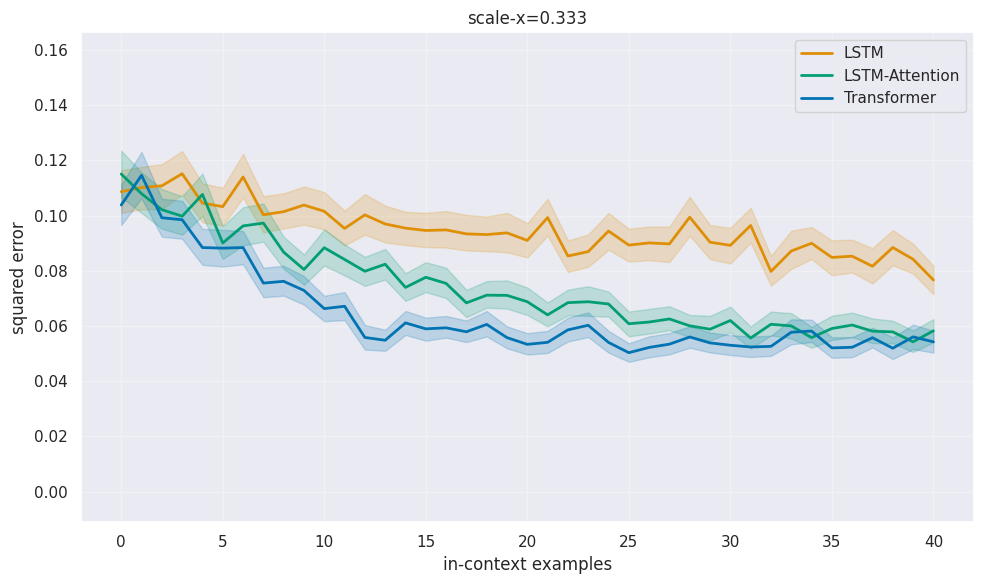

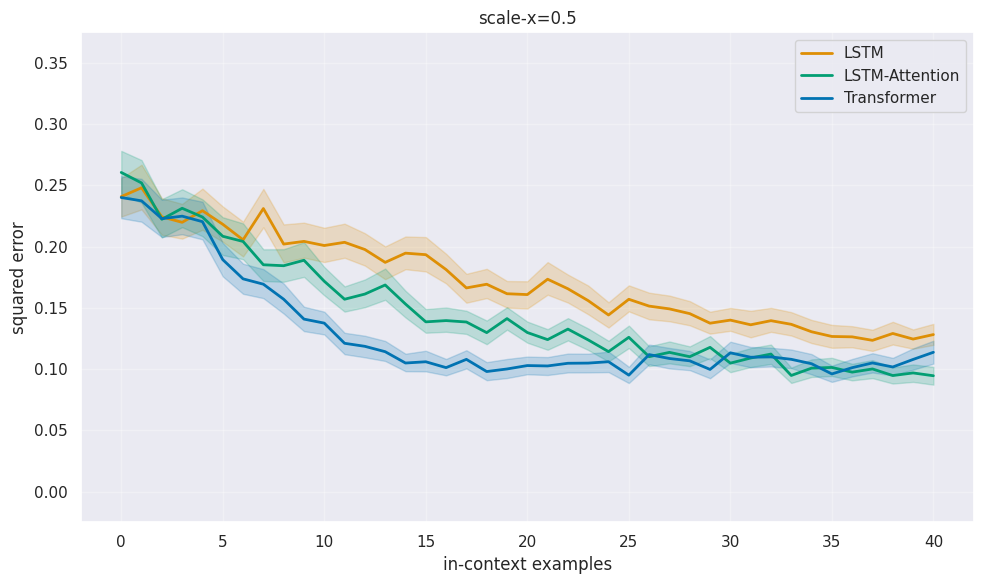

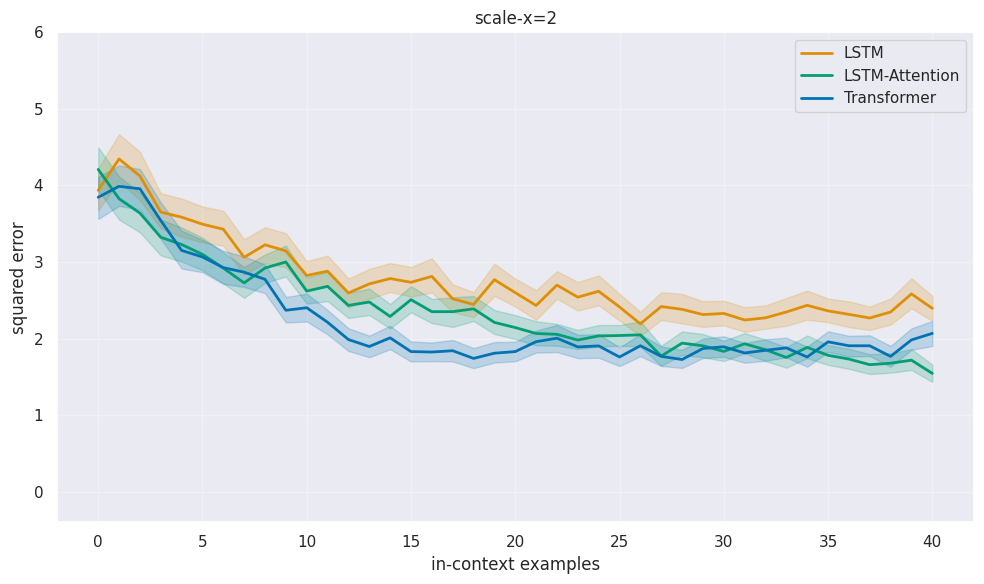

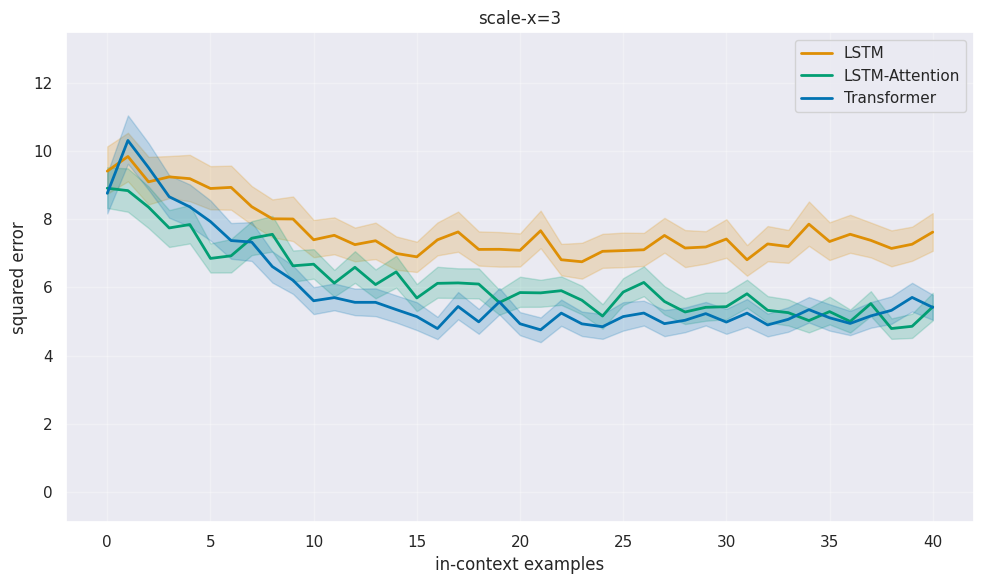

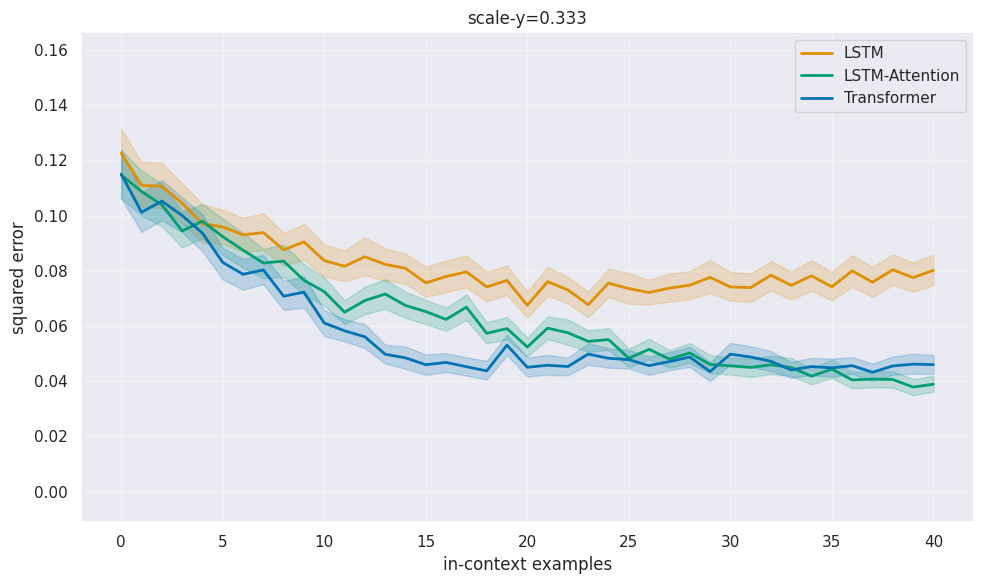

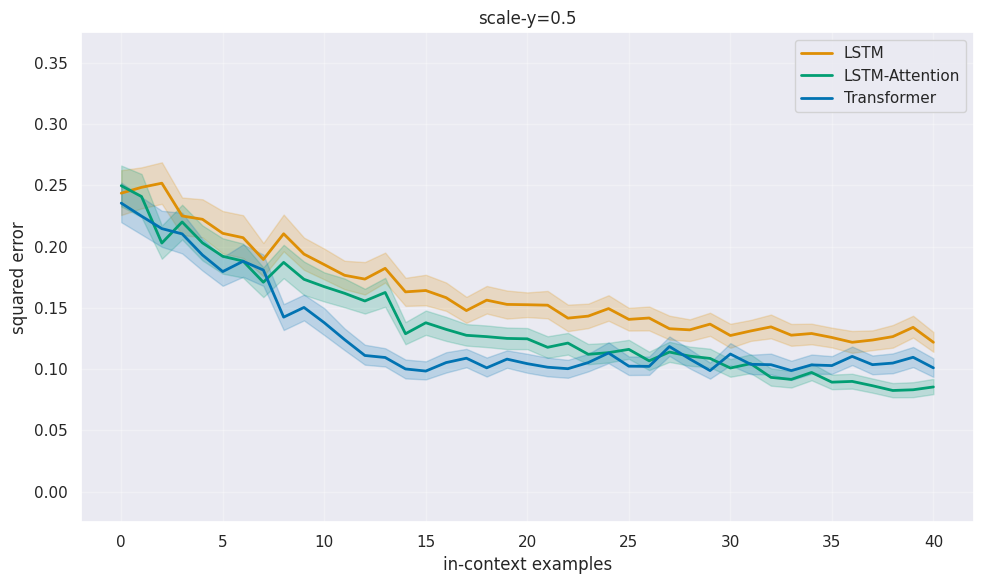

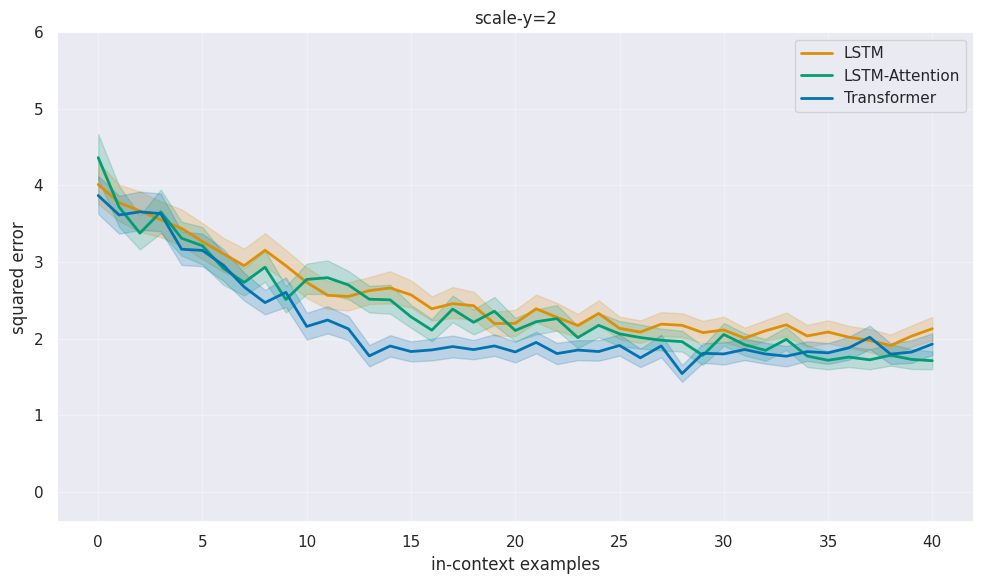

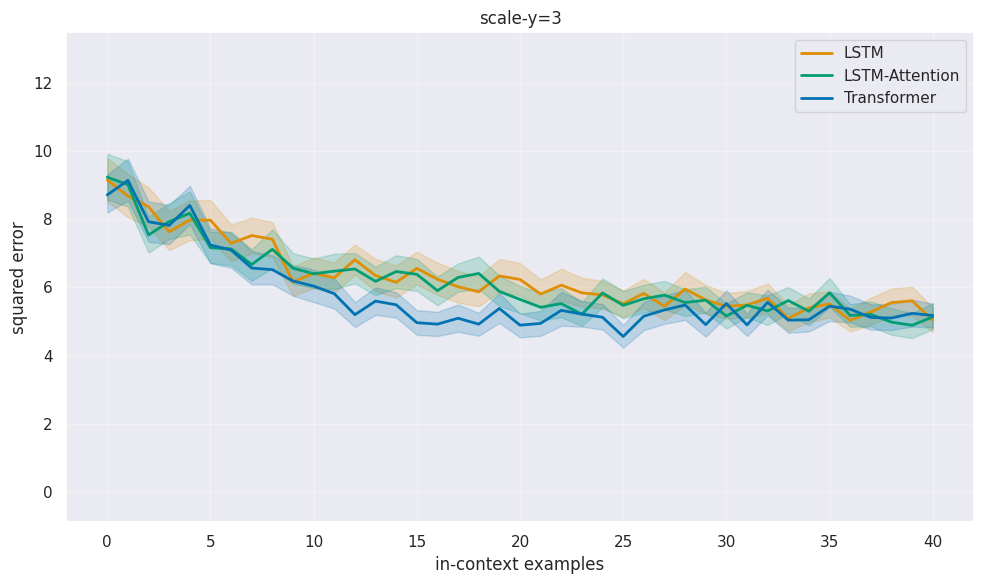

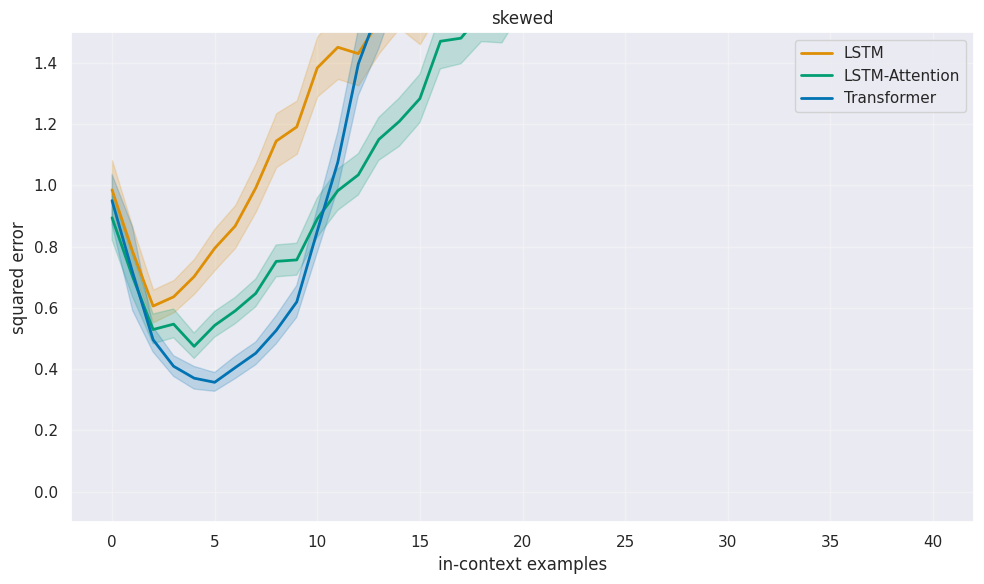

In [ ]:
if len(model_configs) > 0:
    print("Available metric types:", [k for k in metrics_multi.keys() if k != "standard"])

    colors = {'Transformer': palette[0], 'LSTM': palette[1], 'LSTM-Attention': palette[2]}

    for metric_name in metrics_multi.keys():
        if metric_name == "standard":
            continue

        if "scale" in metric_name:
            scale = float(metric_name.split("=")[-1])**2
        else:
            scale = 1.0

        trivial = 1.0 if "noisy" not in metric_name else (1+1/n_dims_compare)

        fig, ax = plt.subplots(1, 1, figsize=(10, 6))

        for short_name, run_id, full_name in model_configs:
            if full_name in metrics_multi[metric_name]:
                metric_data = metrics_multi[metric_name][full_name]
                mean_vals = metric_data['mean']
                low_vals = metric_data.get('bootstrap_low', mean_vals)
                high_vals = metric_data.get('bootstrap_high', mean_vals)

                x_range = range(len(mean_vals))
                color = colors.get(short_name, palette[3])

                ax.plot(x_range, mean_vals, '-', label=short_name, color=color, lw=2)
                ax.fill_between(x_range, low_vals, high_vals, alpha=0.2, color=color)

        ax.set_xlabel("in-context examples")
        ax.set_ylabel("squared error")
        ax.set_title(metric_name)
        ax.legend(loc='best')
        ax.grid(True, alpha=0.3)

        if "ortho" in metric_name:
            ax.set_xlim(-1, n_dims_compare - 1)
        ax.set_ylim(-.1 * scale, 1.5 * scale)

        plt.tight_layout()
        plt.show()
else:
    print("No models to compare")

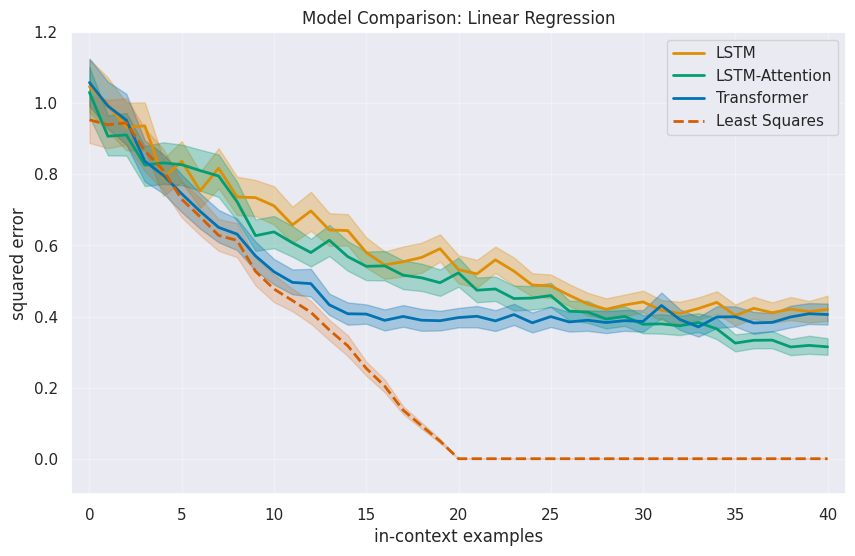

In [ ]:
if len(model_configs) > 0:
    plt.figure(figsize=(10, 6))

    colors = {'Transformer': palette[0], 'LSTM': palette[1], 'LSTM-Attention': palette[2], 'Least Squares': palette[3]}

    for short_name, run_id, full_name in model_configs:
        if full_name in metrics_multi['standard']:
            metric_data = metrics_multi['standard'][full_name]
            mean_vals = metric_data['mean']
            low_vals = metric_data['bootstrap_low']
            high_vals = metric_data['bootstrap_high']

            x_range = range(len(mean_vals))
            color = colors.get(short_name, palette[4])

            plt.plot(x_range, mean_vals, '-', label=short_name, color=color, lw=2)
            plt.fill_between(x_range, low_vals, high_vals, alpha=0.3, color=color)

    # Add Least Squares baseline
    if 'Least Squares' in metrics_multi['standard']:
        metric_data = metrics_multi['standard']['Least Squares']
        mean_vals = metric_data['mean']
        low_vals = metric_data['bootstrap_low']
        high_vals = metric_data['bootstrap_high']

        x_range = range(len(mean_vals))
        color = colors['Least Squares']

        plt.plot(x_range, mean_vals, '--', label='Least Squares', color=color, lw=2)
        plt.fill_between(x_range, low_vals, high_vals, alpha=0.2, color=color)

    for _, row in df.iterrows():
        if row.run_id == model_configs[0][1]:
            first_model_task = row.task
            break

    run_path_any = os.path.join(run_dir, first_model_task, model_configs[0][1])
    _, conf_any = get_model_from_run(run_path_any, only_conf=True)
    n_dims_compare = conf_any.model.n_dims

    plt.xlabel("in-context examples")
    plt.ylabel("squared error")
    plt.title(f"Model Comparison: Linear Regression")
    plt.legend(loc='best')
    plt.grid(True, alpha=0.3)
    plt.xlim(-1, len(mean_vals))
    plt.ylim(-0.1, 1.2)
    plt.show()
else:
    print("No models to compare")

Available metric types: ['half_subspace', 'noisyLR', 'orthogonal_train_test', 'overlapping_train_test', 'random_quadrants', 'scale-x=0.333', 'scale-x=0.5', 'scale-x=2', 'scale-x=3', 'scale-y=0.333', 'scale-y=0.5', 'scale-y=2', 'scale-y=3', 'skewed']


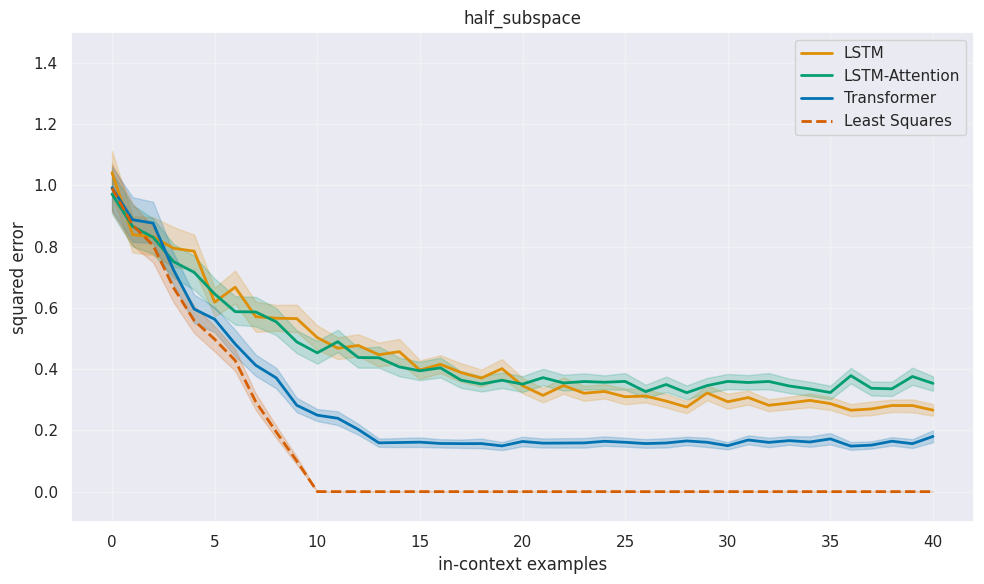

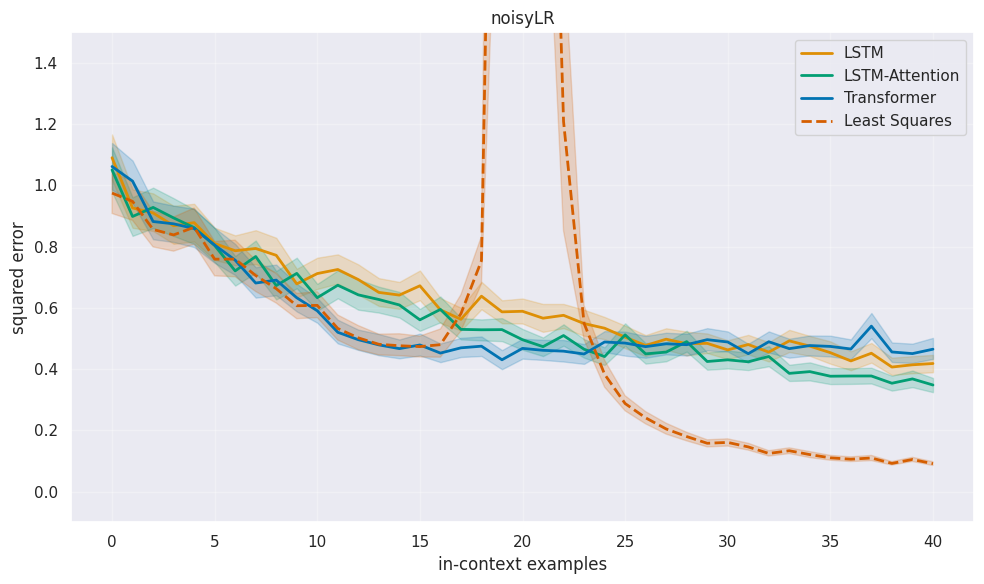

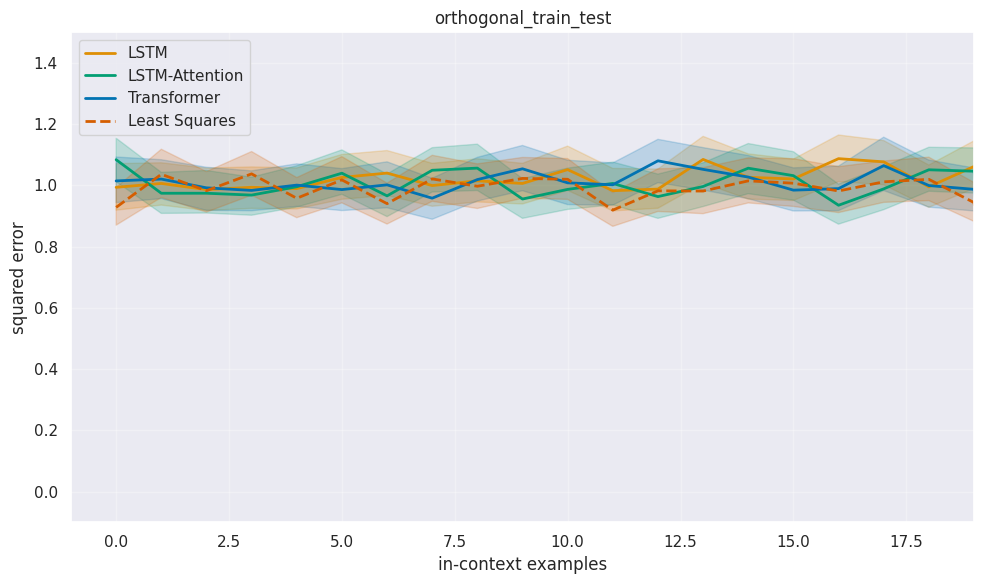

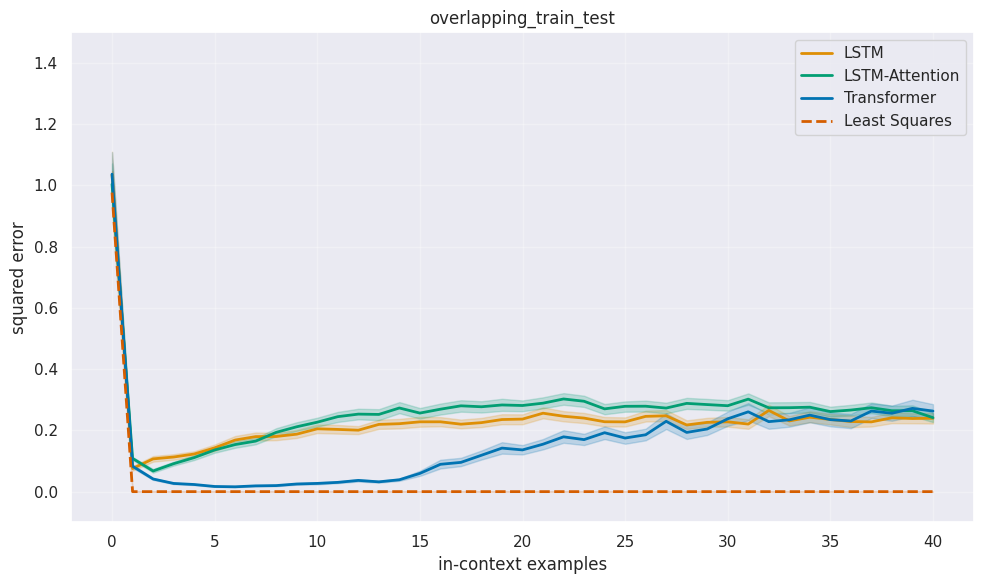

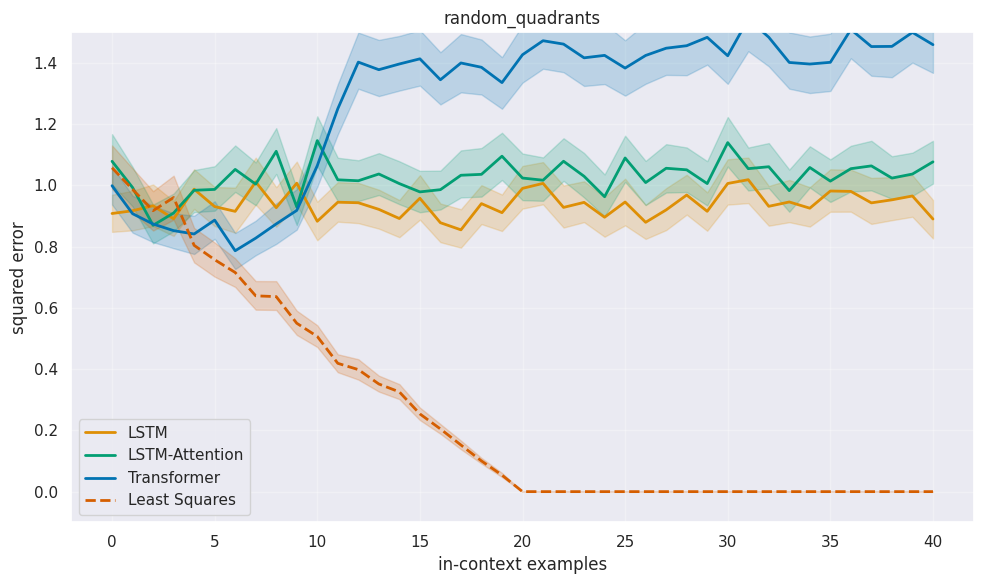

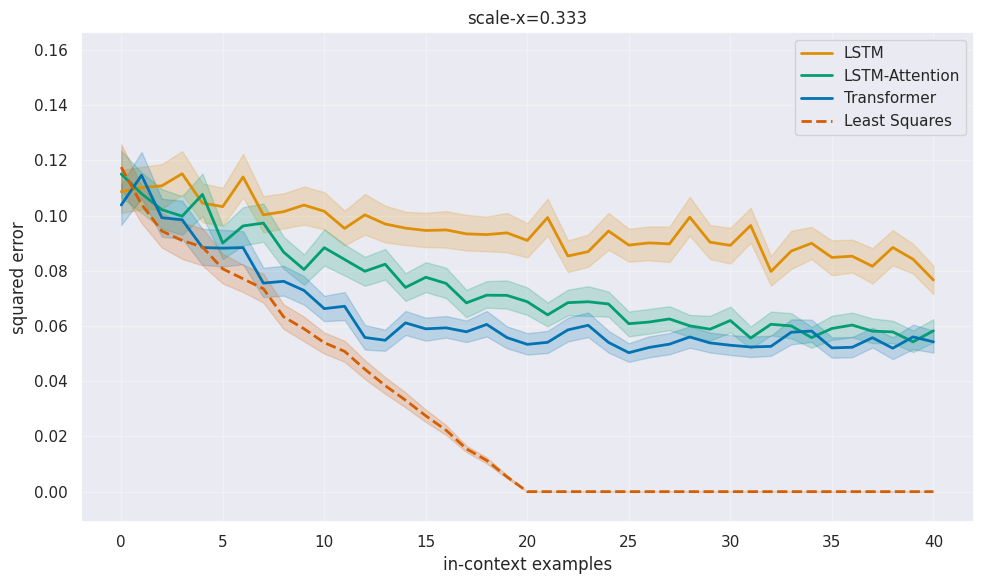

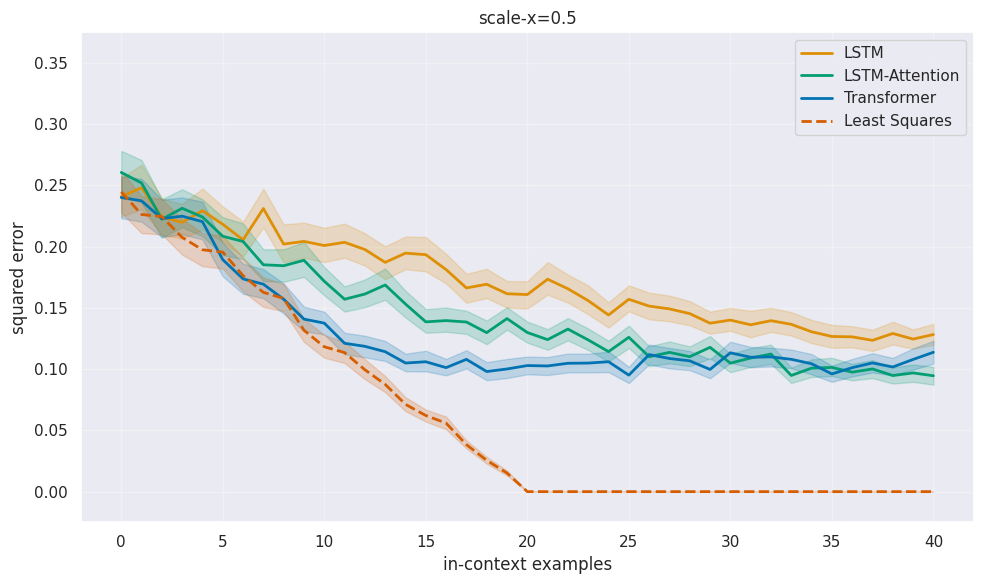

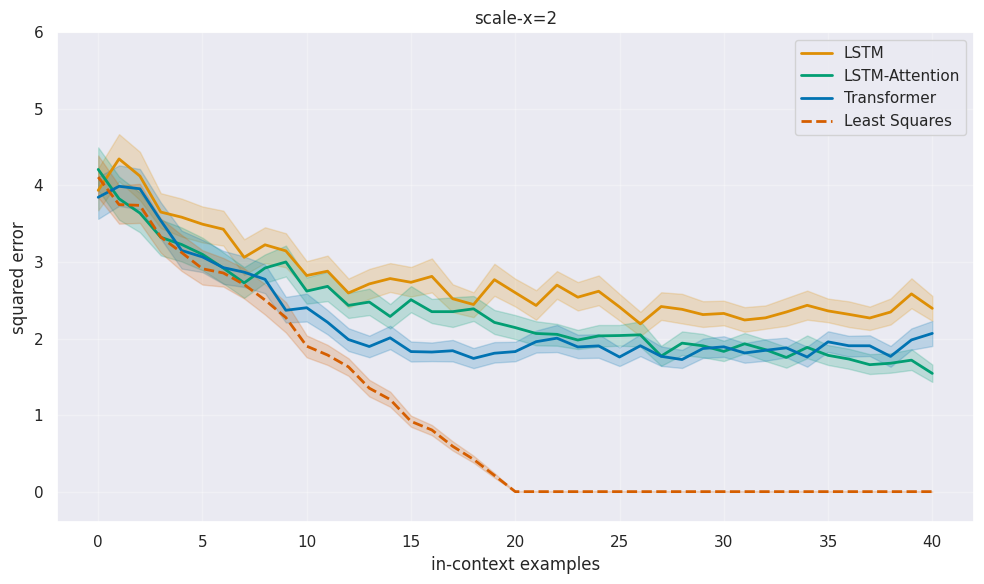

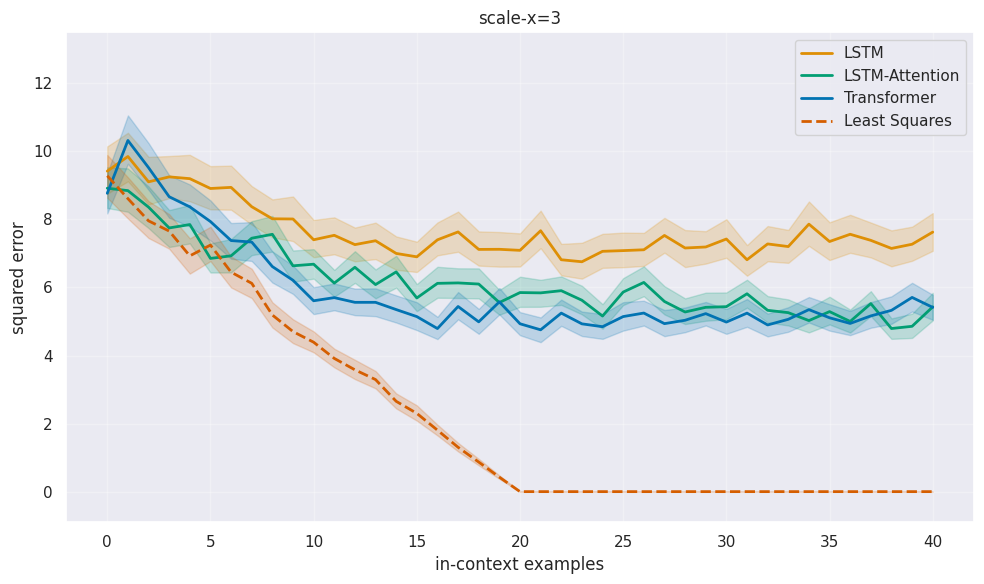

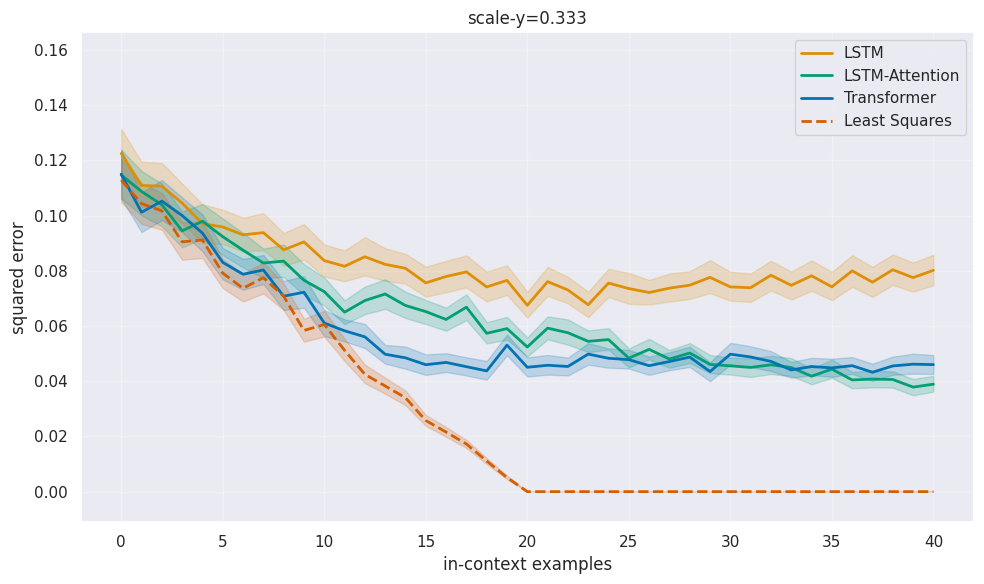

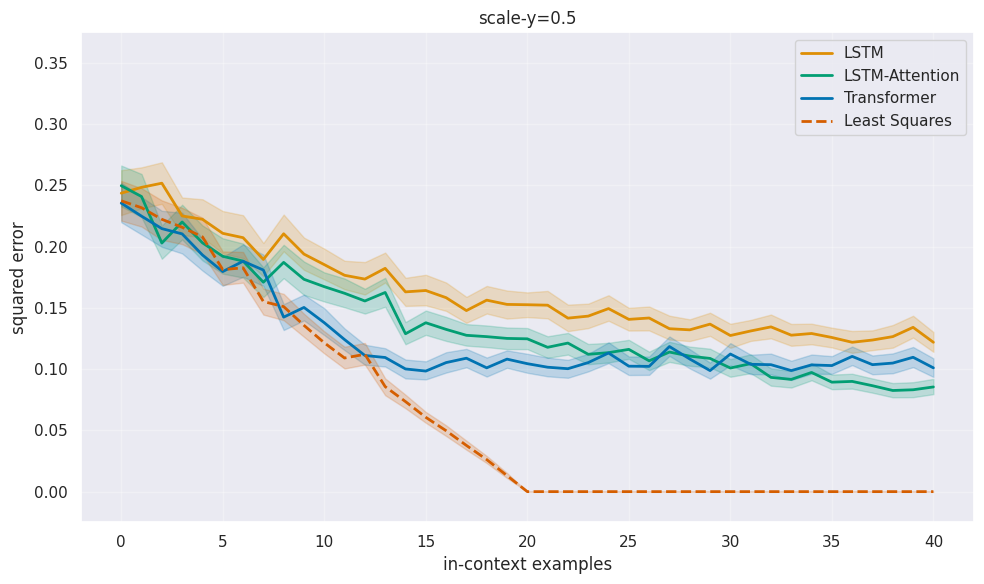

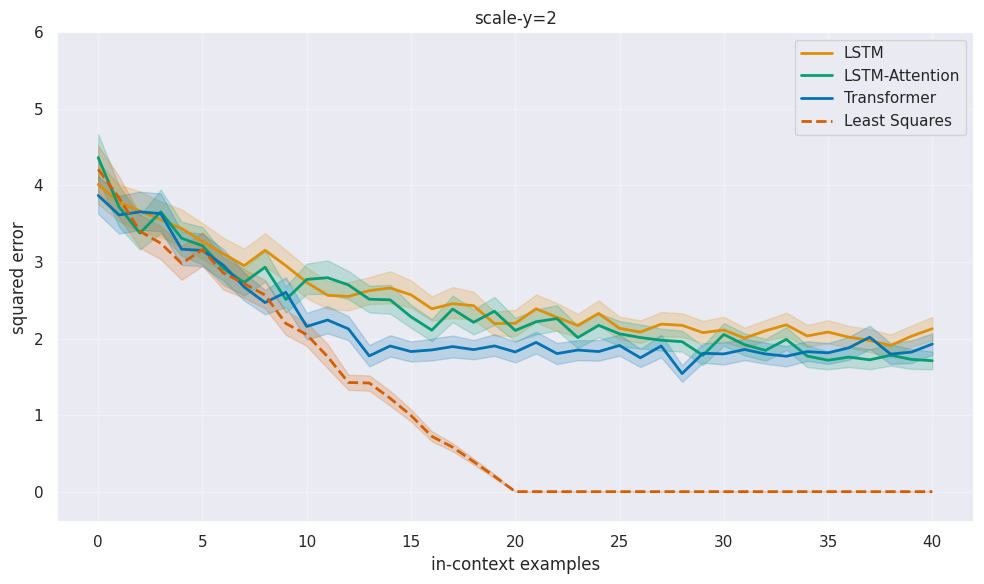

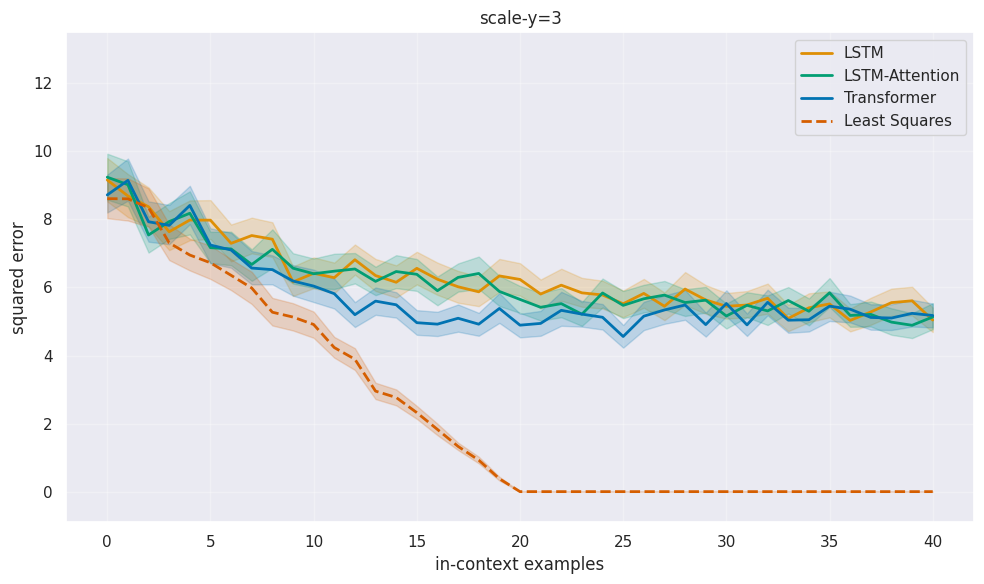

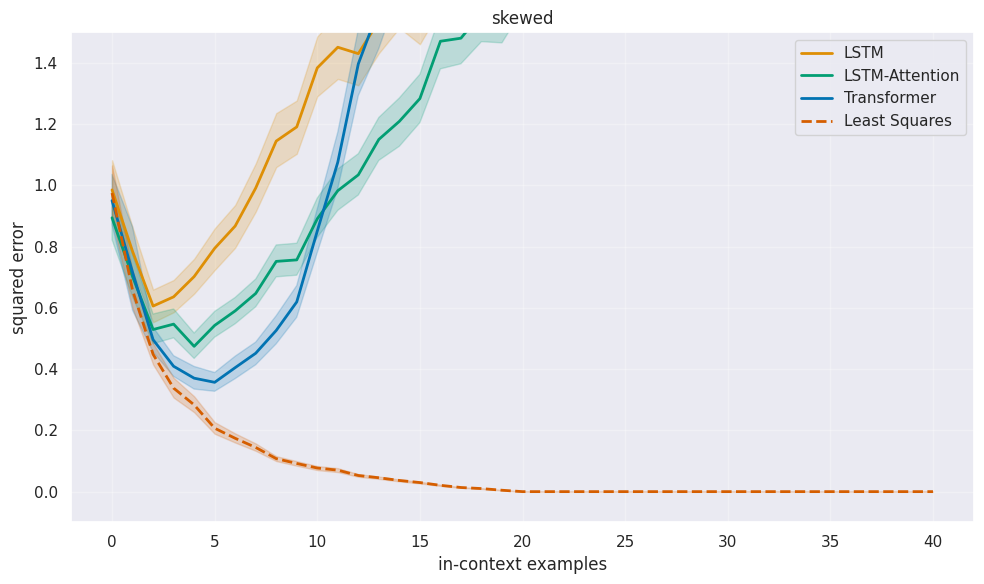

In [ ]:
if len(model_configs) > 0:
    print("Available metric types:", [k for k in metrics_multi.keys() if k != "standard"])

    # Find the correct task name for the first model to get config
    for _, row in df.iterrows():
        if row.run_id == model_configs[0][1]:
            first_model_task = row.task
            break

    run_path_any = os.path.join(run_dir, first_model_task, model_configs[0][1])
    _, conf_any = get_model_from_run(run_path_any, only_conf=True)
    n_dims_compare = conf_any.model.n_dims

    colors = {'Transformer': palette[0], 'LSTM': palette[1], 'LSTM-Attention': palette[2], 'Least Squares': palette[3]}

    for metric_name in metrics_multi.keys():
        if metric_name == "standard":
            continue

        # Check if any of our models has data for this metric
        has_model_data = False
        for short_name, run_id, full_name in model_configs:
            if full_name in metrics_multi[metric_name]:
                has_model_data = True
                break

        if not has_model_data:
            print(f"Skipping '{metric_name}' - no model data (only baselines available)")
            continue

        if "scale" in metric_name:
            scale = float(metric_name.split("=")[-1])**2
        else:
            scale = 1.0

        trivial = 1.0 if "noisy" not in metric_name else (1+1/n_dims_compare)

        fig, ax = plt.subplots(1, 1, figsize=(10, 6))

        for short_name, run_id, full_name in model_configs:
            if full_name in metrics_multi[metric_name]:
                metric_data = metrics_multi[metric_name][full_name]
                mean_vals = metric_data['mean']
                low_vals = metric_data.get('bootstrap_low', mean_vals)
                high_vals = metric_data.get('bootstrap_high', mean_vals)

                x_range = range(len(mean_vals))
                color = colors.get(short_name, palette[4])

                ax.plot(x_range, mean_vals, '-', label=short_name, color=color, lw=2)
                ax.fill_between(x_range, low_vals, high_vals, alpha=0.2, color=color)

        if 'Least Squares' in metrics_multi[metric_name]:
            metric_data = metrics_multi[metric_name]['Least Squares']
            mean_vals = metric_data['mean']
            low_vals = metric_data.get('bootstrap_low', mean_vals)
            high_vals = metric_data.get('bootstrap_high', mean_vals)

            x_range = range(len(mean_vals))
            color = colors['Least Squares']

            ax.plot(x_range, mean_vals, '--', label='Least Squares', color=color, lw=2)
            ax.fill_between(x_range, low_vals, high_vals, alpha=0.2, color=color)

        ax.set_xlabel("in-context examples")
        ax.set_ylabel("squared error")
        ax.set_title(metric_name)
        ax.legend(loc='best')
        ax.grid(True, alpha=0.3)

        if "ortho" in metric_name:
            ax.set_xlim(-1, n_dims_compare - 1)
        ax.set_ylim(-.1 * scale, 1.5 * scale)

        plt.tight_layout()
        plt.show()
else:
    print("No models to compare")

In [ ]:
# Download entire content folder to local
from google.colab import files
import shutil
import os

# Create a zip file of the content folder
shutil.make_archive('/content/cs182', 'zip', '/content')

# Download the zip file
files.download('/content/cs182.zip')

print("Download started!")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download started!
